<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/5/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 決定木を使った実験
- 目的
    - 決定木を用いた分類の把握
- 内容
    - Irisデータセットに対して、深さ3の決定木を使って分類
    - 学習データセットに対する分類精度の確認
    - 木の構造の可視化
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://pythondatascience.plavox.info/scikit-learn/scikit-learnで決定木分析

In [1]:
from sklearn.datasets import load_iris

In [2]:
# Irisデータセットのロード
iris = load_iris()

In [3]:
# 深さ3の小さい決定木を用いて分類
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

In [4]:
# 学習データに対して推論をする
predicted = clf.predict(iris.data)

In [5]:
# 精度の確認（正答数/データ数）
sum(predicted == iris.target) / len(iris.target)

0.9733333333333334

In [6]:
import pydotplus
from six import StringIO

# 木構造の可視化
dot_data = tree.export_graphviz(clf, out_file="tree.dot",
                    feature_names=iris.feature_names,
                    class_names=iris.target_names)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

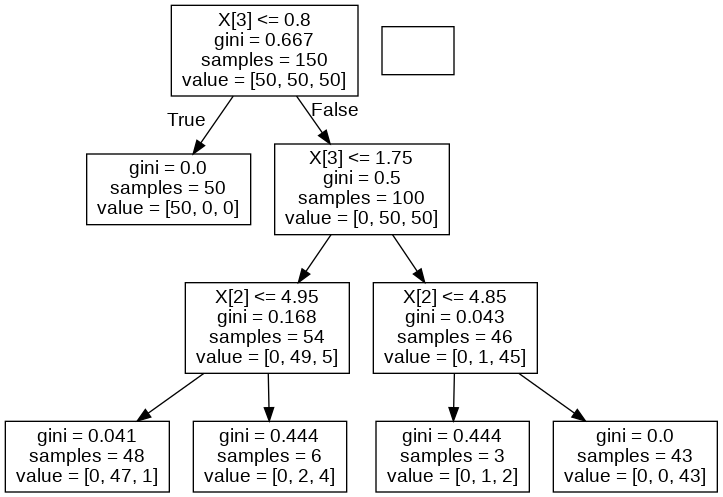

In [7]:
# 決定木を可視化
from IPython.display import Image
Image(graph.create_png())